In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
# Load dataset, adjust 'Date' field format
df=pd.read_csv("../input/retail-analysis-with-walmart-data/Walmart_Store_sales.csv")
df['Date'] =  pd.to_datetime(df['Date'], format="%d-%m-%Y")

## Descriptive statistics and data distribution

Distribution of weekly sales per shop is given below:

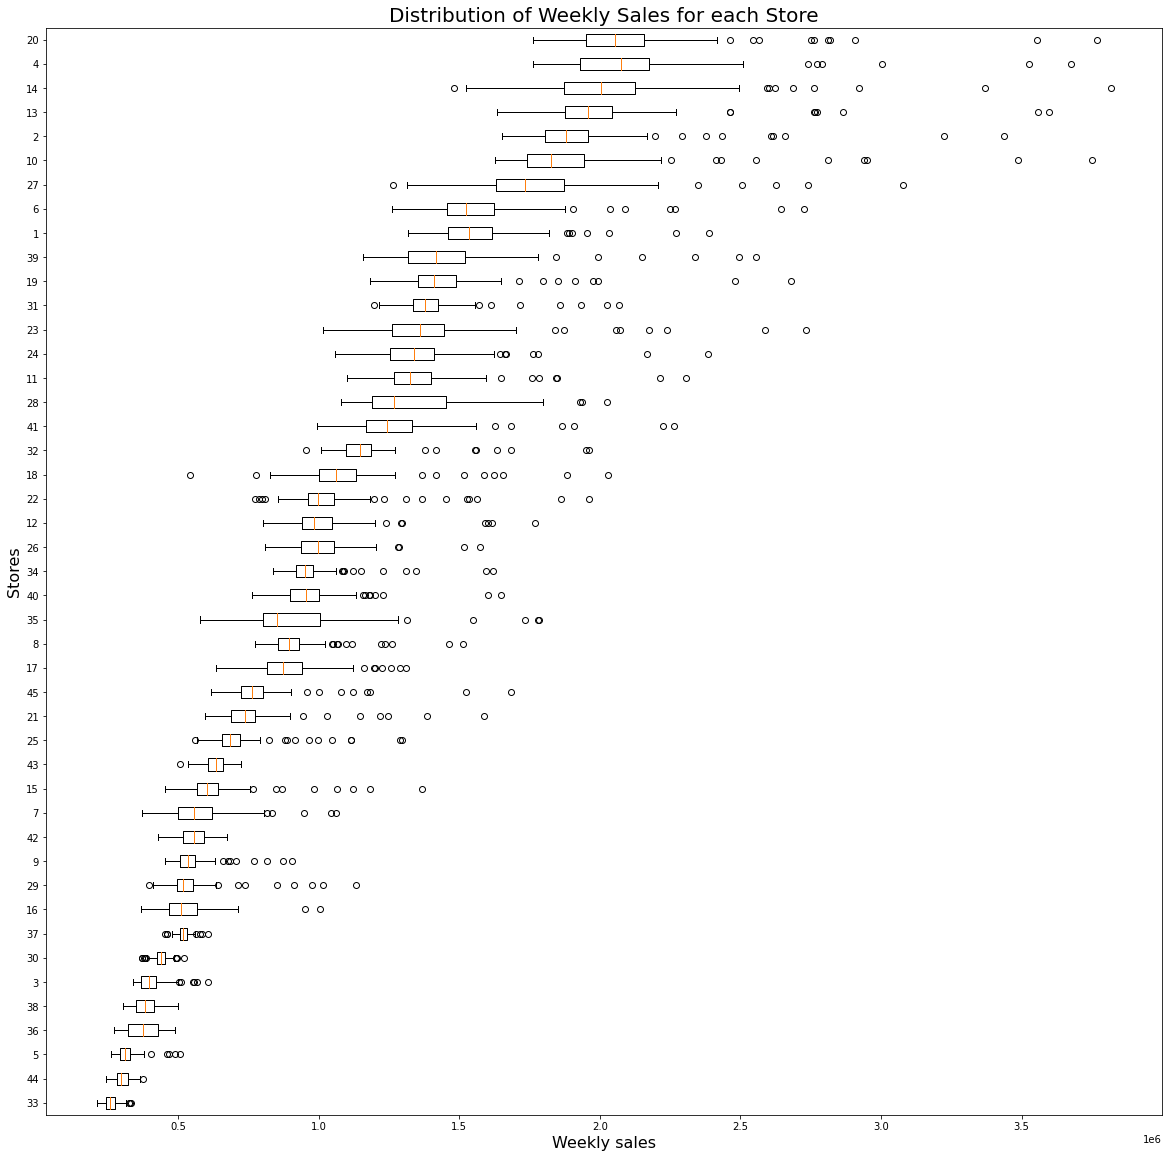

In [3]:
data=[]
for i in range(1,46):
    y=df[df.Store==i].Weekly_Sales
    data.append([np.mean(y),y,i])
    #y=y/np.mean(y)
data.sort()
data2=[]
labels=[]
for d in data:
    data2.append(d[1])
    labels.append(d[2])
plt.figure(figsize=(20,20))
plt.boxplot(data2,labels=labels,vert=False)
plt.xlabel("Weekly sales", fontsize=16)
plt.ylabel('Stores', fontsize=16)
plt.title('Distribution of Weekly Sales for each Store', fontsize=20)
plt.show()

Average weekly sales varies from about 250 thousand dollars to about 2 millions. There is correlation between average sales and standard deviation of average sales which means that we have to deal with heteroscedasticity in the data. Finally, there are outliers in weekly sales almost for all shops in the dataset.  

Weekly sales, % of mean sales value 

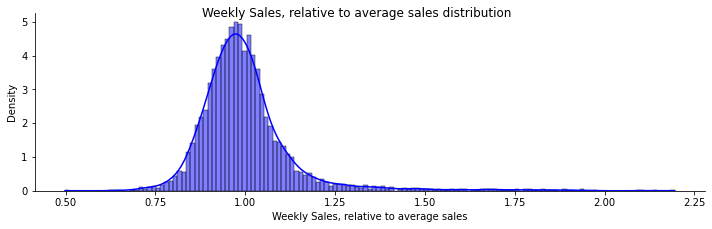

In [4]:
data3=[]
for i in range(1,46):
    y=df[df.Store==i].Weekly_Sales
    y=y/np.mean(y)
    data3 = data3+y.to_list()

#plt.hist(data3,bins=100)
sns.displot(data3, stat='density', color = 'blue',height=3, aspect=10/3, kde=True)
plt.suptitle("Weekly Sales, relative to average sales distribution")
plt.xlabel("Weekly Sales, relative to average sales")
plt.show()

On average weekly sales have dsitribution which resembles a normal, but it has fat tails.

## Temporal trends in data

While majority of stores show similar trends, some stores show completely different trends. Such examples are given below:

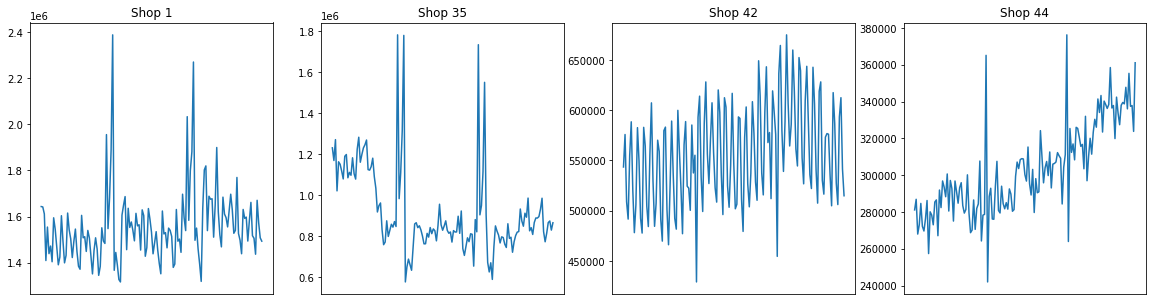

In [5]:
fig, ax=plt.subplots(1,4,figsize=(20,5))
j=0
for i in (1,35,42,44):
#    x=df[df.Store==i].Date
    y=df[df.Store==i].Weekly_Sales
    ax[j].set_xticks([])

    ax[j].plot(y)
    ax[j].set_title("Shop "+str(i))
    j=j+1
#    ax2 = ax[(i-1)%9,(i-1)//9].twinx()
#    ax2.plot(df[df.Store==i].Holiday_Flag,color='red')

plt.show()

The mean weekly sales of each store. 

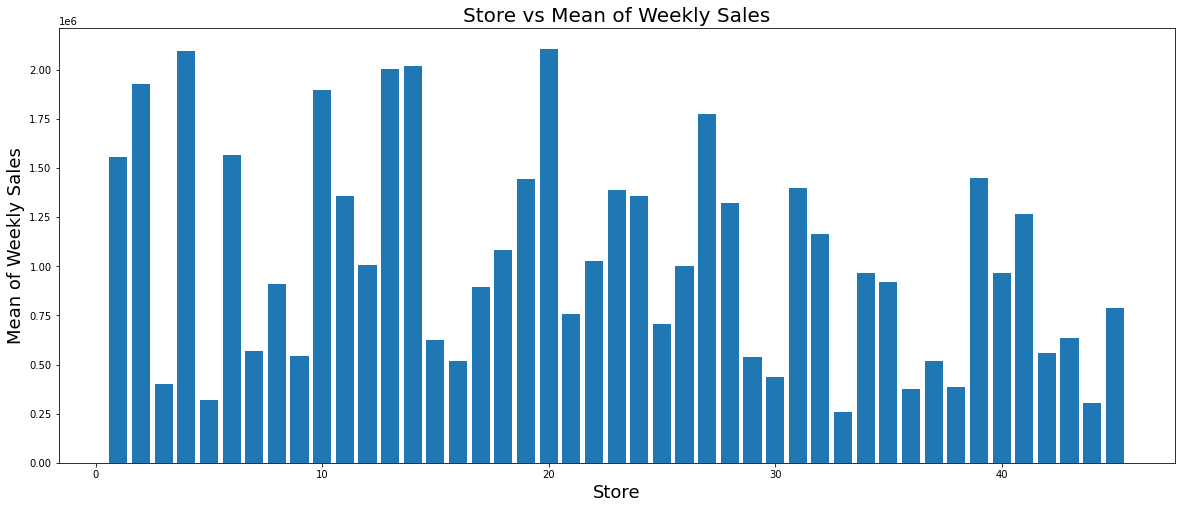

In [6]:
plt.figure(figsize=(20,8))
m = []
for i in range(1, 46):
    y = df[df.Store==i].Weekly_Sales.mean()
    m.append(y)
plt.bar(range(1, 46,), m)
plt.xlabel('Store', fontsize=18)
plt.ylabel('Mean of Weekly Sales', fontsize=18)
plt.title('Store vs Mean of Weekly Sales', fontsize=20)
plt.show()

The sales per store varies a lot. It maybe caused by the location of the stores and other features in the dataset.

Overall trend of each column over Date (all stores)

In [7]:
df_sales_weekly = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_agg_temp = df.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"Holiday_Flag":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})

df_agg_temp["Holiday_Flag"] = df_agg_temp["Holiday_Flag"].apply(lambda x: 1 if x == 45.0 else 0)
df_agg = pd.merge(df_agg_temp, df_sales_weekly, left_index=True, right_on='Date', how='inner')
df_agg = df_agg.set_index('Date')

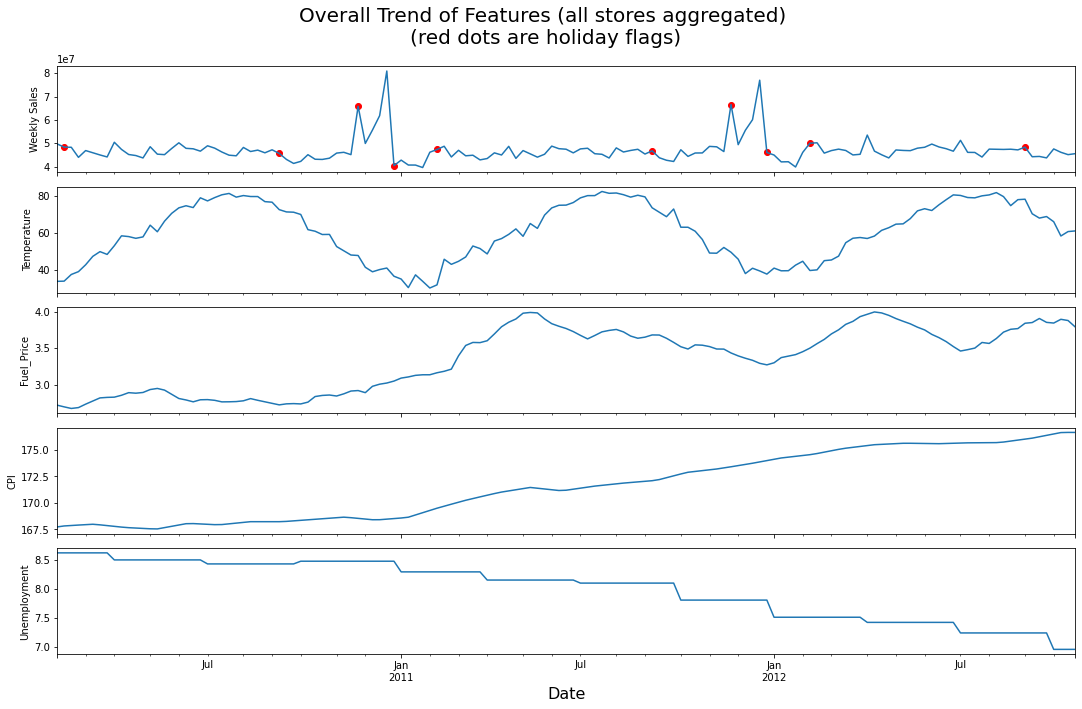

In [8]:
fig, ax = plt.subplots(5,1,figsize=(15,10),sharex=True) 
df_agg["Weekly_Sales"].plot(ax=ax[0])

# mark red for holidays 
holiday = (df_agg['Holiday_Flag']==1)
ax[0].scatter(df_agg[holiday].index, df_agg[holiday]['Weekly_Sales'], color='r')

df_agg["Temperature"].plot(ax=ax[1])
df_agg["Fuel_Price"].plot(ax=ax[2])
df_agg["CPI"].plot(ax=ax[3])
df_agg["Unemployment"].plot(ax=ax[4])

ax[0].set_ylabel("Weekly Sales")
ax[1].set_ylabel("Temperature")
ax[2].set_ylabel("Fuel_Price")
ax[3].set_ylabel("CPI")
ax[4].set_ylabel("Unemployment")
plt.xlabel('Date', fontsize=16)
plt.suptitle("Overall Trend of Features (all stores aggregated) \n" 
             "(red dots are holiday flags)", fontsize=20)
plt.tight_layout();


Weekly_Sales shows strong seasonal effect, as was alredy mentioned above. Average temperature varies cyclically across the year.
It is well known fact that fuel prices, CPI and Unemployment correlates with economical cycle and we can observe it on the charts above.

## Correlation analysis

Scatterplots, Weekly_Sales vs all features is shown below:

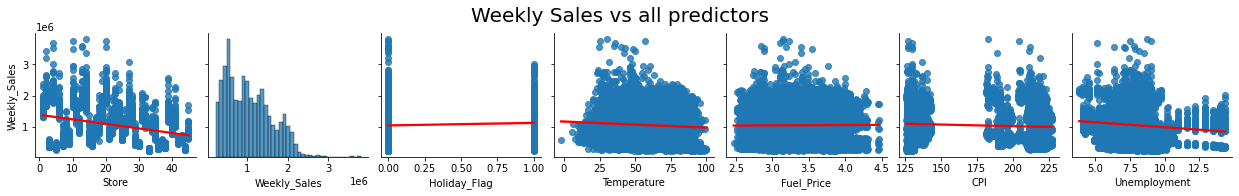

In [9]:
sns.pairplot(df, y_vars='Weekly_Sales', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Weekly Sales vs all predictors', y=1.05, fontsize=20)
plt.show()

There is no strong correlation between Weekly_Sales and any other feature, but some trend, for example between Weekly_Sales and Unemployment can be noticed.

If we plot correlation plot for individual shops, we can find that trend varies a lot across different stores.

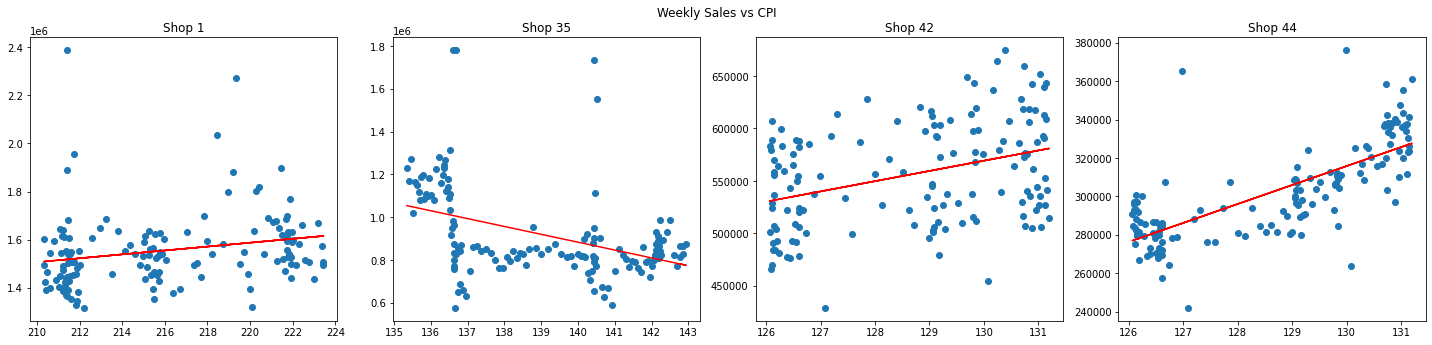

In [10]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
#plt.subplots_adjust(hspace=0.4)
j=0
for i in (1,35,42,44):
    x=df[df.Store==i].CPI
    y=df[df.Store==i].Weekly_Sales
    ax[j].scatter(x,y)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    #add trendline to plot
    ax[j].set_title("Shop "+str(i))
    ax[j].plot(x, p(x),color='red')
    j=j+1
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.suptitle("Weekly Sales vs CPI")
plt.show()

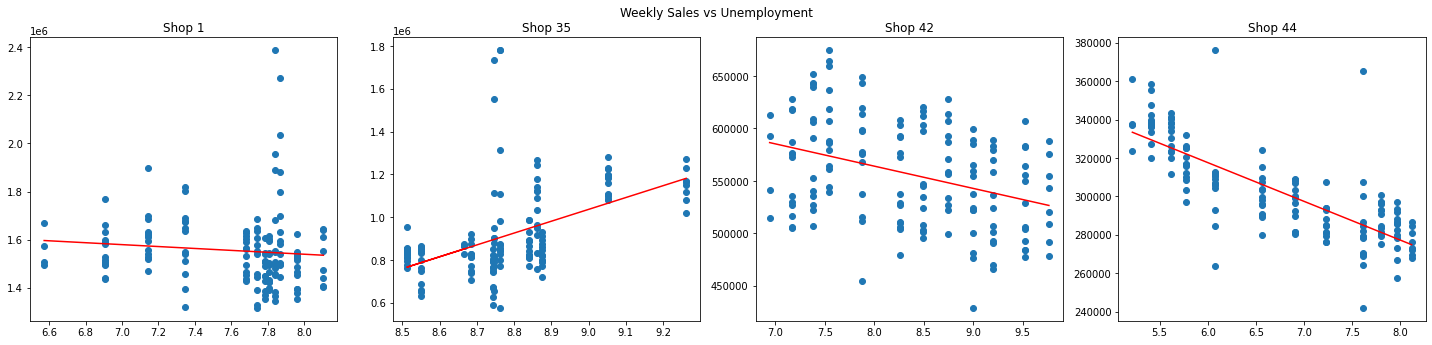

In [11]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
#plt.subplots_adjust(hspace=0.4)
j=0
for i in (1,35,42,44):
    x=df[df.Store==i].Unemployment
    y=df[df.Store==i].Weekly_Sales
    ax[j].scatter(x,y)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    #add trendline to plot
    ax[j].set_title("Shop "+str(i))
    ax[j].plot(x, p(x),color='red')
    j=j+1
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.suptitle("Weekly Sales vs Unemployment")
plt.show()

## Linear regression model

In [12]:
# import
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,mean_squared_error

As a baseline we will use simple Linear Regression Model including all the features with first degree, no scaling
. Since store number is a categorical variable, we will use one-hot encoding for this variable.
It is reasonable to expect that independent variables affect dependent variable in a multiplicative way. For example, sales on holidays will increase not by fixed amount in comparison of sales on workday, but multiplied by certain factor. Therefore, we will make log-transformation of weekly sales value. As a result, our baseline model will be in the form:
$$\log\left(S_t\right)=\sum_{i=1}^{N}{\beta_ie_i}+\alpha_1H_t+\alpha_2F_t+\alpha_3T_i+\alpha_4C_i+\alpha_5U_i$$
where $S_t$-weekly sales at date $t$, $e_i$ – one-hot encoding of shop number, $H_t$, $F_t$, $T_i$, $C_i$, $U_i$ – are holiday flag, fuel price, temperature, CPI and Unemployment at date $t$ correspondingly and $\beta_i,\alpha_i$ – model coefficients. 

### One-hot encoding

To implement one-hot encoding we using get_dummies method of pandas 

In [13]:
# prepare data
X=pd.concat([pd.get_dummies(df['Store'],prefix='Store'),
             df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]],axis=1)
y=np.log(df['Weekly_Sales'])
# initialize linear regression model
lreg = LinearRegression()


Note that one-hot encoding with 46 stores creates problems with validation. Since flag for certain store presents only in $1/46\approx 2,17\%$ of data, and the dataset is sorted by store number, there are high chances that cross validation  leaves one store our completey in training set. Such set has problem with multicollinearity and generates extermly large MSE. One example can be found below (baseline model with square of unemployment):

In [14]:
X1=X.copy()
X1['Unemployment_2']=X1['Unemployment']*X1['Unemployment']
mse_score = cross_validate(
        lreg,
        X,
        y,
        cv=10,
        scoring="neg_mean_squared_error",
        return_train_score=True
    )

print(mse_score['test_score'])

[-0.51886908 -0.19338038 -0.24943574 -0.15417638 -0.17593742 -0.22549088
 -0.23665229 -0.56464106 -0.15502954 -0.33917263]


Note that test scores are extremly large.

To avoid this problem we will use 10-fold cross validation with suffling.

In [15]:
nfold = KFold(n_splits=10,shuffle=True,random_state=42)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=109)
lreg.fit(X_train,y_train)
y_train_predict=lreg.predict(X_train)
y_test_predict=lreg.predict(X_test)
scores=pd.DataFrame({'Train Score':np.sqrt(mean_squared_error(np.exp(y_train_predict),np.exp(y_train))),
                     'Test Score':np.sqrt(mean_squared_error(np.exp(y_test_predict),np.exp(y_test)))},
                      index=['Baseline Model (RMSE)'])

Another problem is that in the charts above it is clearly visible that sales very much depends on week number, having big spike before Christmas and significant decline after it. To keep information about date we will add week number using one-hot encoding to the regressors list.

In [17]:
X=pd.concat([pd.get_dummies(df['Store'],prefix='Store'),
             pd.get_dummies(df['Date'].dt.isocalendar().week,prefix='Week'),
             df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]],axis=1)

In [18]:
# Utility function to add mean and standard deviation of test_score to
# dataframe
def add_test_score(model_name, mse_score):
    global model_mse
    mse_df = pd.DataFrame({'model':[model_name],
                           'mse':[np.mean(-mse_score["test_score"])],
                           'sd':[np.std(-mse_score["test_score"])]})  
    try: 
        model_mse
    except:
        model_mse = mse_df
    else:
        model_mse=model_mse.append(mse_df)
        

We will start with the baseline model

In [19]:
# Baseline model
mse_score = cross_validate(
        lreg,
        X,
        y,
        cv=nfold,
        scoring="neg_mean_squared_error",
        return_train_score=True
    )

add_test_score('Baseline model', mse_score)

For comparison we will use models with eliminated regressor (one model for each regressor)

In [20]:
# Sequentially eliminate regressors 
for col in ('Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'):
    X1=X.drop(col,axis=1)

    mse_score = cross_validate(
        lreg,
        X1,
        y,
        cv=nfold,
        scoring="neg_mean_squared_error",
        return_train_score=True
    )
    add_test_score('Eliminated '+col, mse_score)

# Eliminate Store
X1=X[['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
mse_score = cross_validate(
    lreg,
    X1,
    y,
    cv=nfold,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

add_test_score('Eliminated Store', mse_score)

# Eliminate week
X1=pd.concat([pd.get_dummies(df['Store'],prefix='Store'),
              df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]],axis=1)
mse_score = cross_validate(
    lreg,
    X1,
    y,
    cv=nfold,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

add_test_score('Eliminated Week', mse_score)


To check if there is non-linear dependency between regressors and weekly sales we will add square of  
* Temperature
* Fuel_Price
* CPI
* Unemployment

In [21]:
# Linearity - Check 2nd degree
for col in ('Temperature', 'Fuel_Price', 'CPI', 'Unemployment'):
    X1=X.copy()
    X1['Square']=X1[col]*X1[col]
    
    mse_score = cross_validate(
        lreg,
        X1,
        y,
        cv=nfold,
        scoring="neg_mean_squared_error",
        return_train_score=True
    )

    add_test_score('Added square '+col, mse_score)

and interaction term between these regressors:

In [22]:
# Linearity - Check interaction term
for col in (('Holiday_Flag', 'Temperature'), 
            ('Holiday_Flag', 'Fuel_Price'), 
            ('Holiday_Flag', 'CPI'),
            ('Holiday_Flag','Unemployment'),
            ('Temperature', 'Fuel_Price'), 
            ('Temperature', 'CPI'),
            ('Temperature','Unemployment'),
            ('Fuel_Price', 'CPI'),
            ('Fuel_Price','Unemployment'),     
            ('CPI','Unemployment')):     
    
    X1=X.copy()
    X1['Interaction']=X1[col[0]]*X1[col[1]]
    
    mse_score = cross_validate(
        lreg,
        X1,
        y,
        cv=nfold,
        scoring="neg_mean_squared_error",
        return_train_score=True
    )

    add_test_score('Added interaction '+col[0]+','+col[1], mse_score)    


Finally we will compare our model with very simple one where only one-hot encoded Store and Holiday_Flag used as regressors 

In [23]:
X1=pd.concat([pd.get_dummies(df['Store'],prefix='Store'),
              pd.get_dummies(df['Date'].dt.isocalendar().week,prefix='Week')],
             axis=1)

mse_score = cross_validate(
        lreg,
        X1,
        y,
        cv=nfold,
        scoring="neg_mean_squared_error",
        return_train_score=True
    )

add_test_score('Store only', mse_score)    

The results are shown in the table below:

In [24]:
model_mse.head(50)

,model,mse,sd
0,Baseline model,0.007426,0.000749
0,Eliminated Holiday_Flag,0.007426,0.000749
0,Eliminated Temperature,0.007511,0.000716
0,Eliminated Fuel_Price,0.007440,0.000757
0,Eliminated CPI,0.007427,0.000748
0,Eliminated Unemployment,0.007666,0.000748
0,Eliminated Store,0.339037,0.015000
0,Eliminated Week,0.014862,0.001485
0,Added square Temperature,0.007315,0.000769
0,Added square Fuel_Price,0.007426,0.000752


Let's show it on the chart:

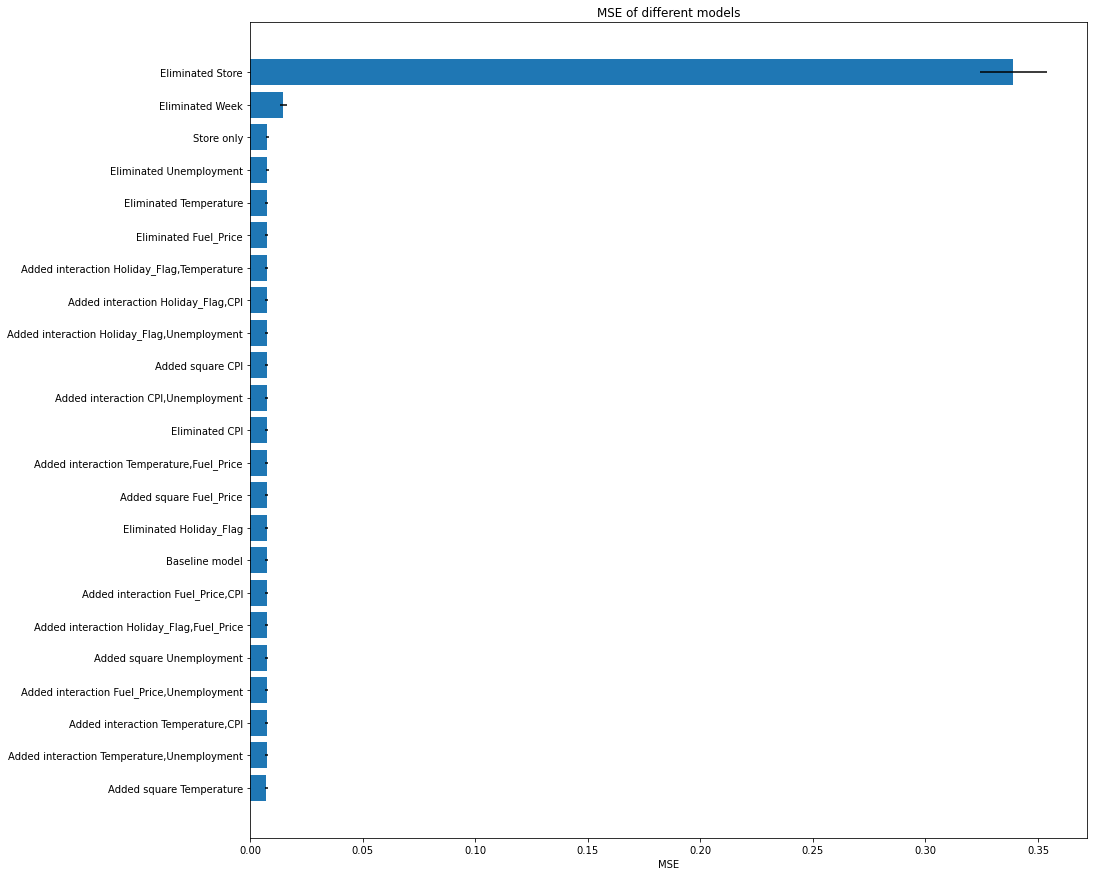

In [25]:
sorted_mse=model_mse.sort_values('mse')
plt.figure(figsize=(15,15))
y_pos = np.arange(len(sorted_mse['mse']))
plt.barh(y_pos, sorted_mse['mse'], xerr=sorted_mse['sd'], align='center')
plt.yticks(y_pos, labels=sorted_mse['model'])
plt.xlabel('MSE')
plt.title('MSE of different models')
plt.show()


It is clearly visible that elimination of Store significantly decrease model precession. We will remove it from results to see more details:

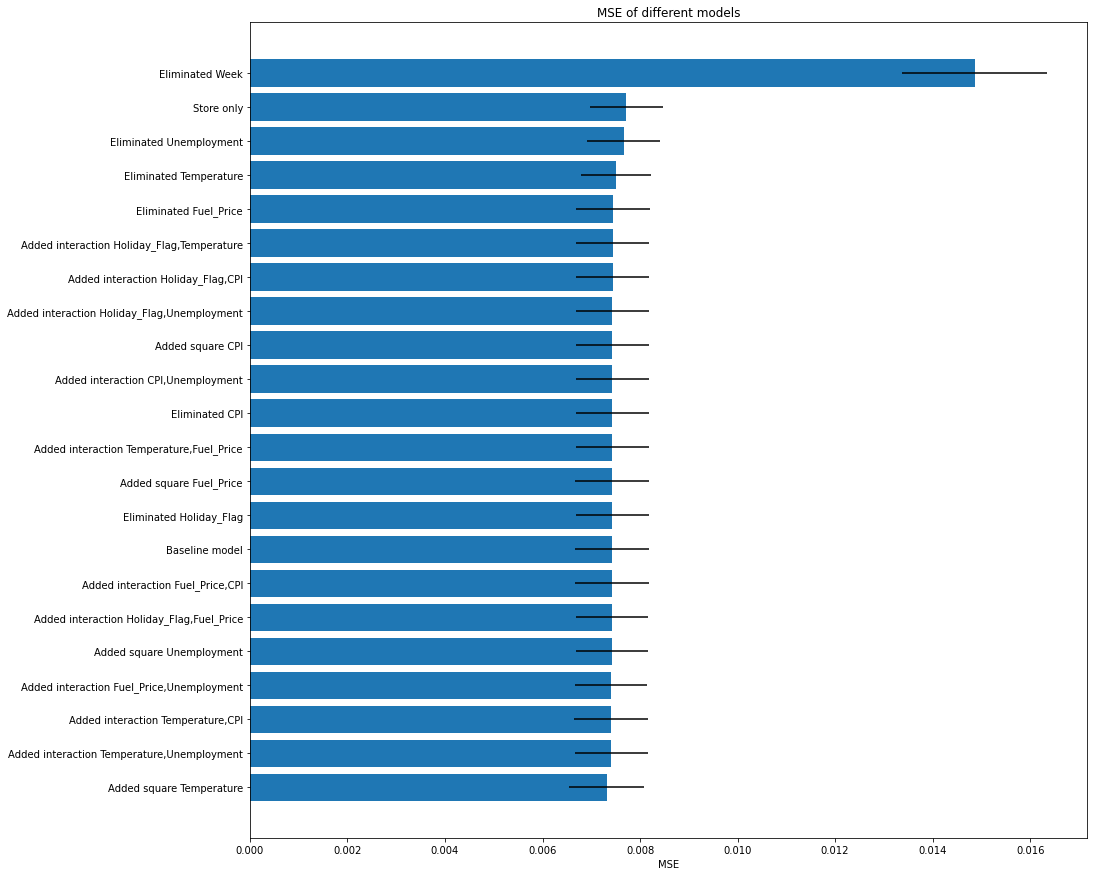

In [26]:
sorted_mse=sorted_mse[sorted_mse.model!='Eliminated Store']
plt.figure(figsize=(15,15))
y_pos = np.arange(len(sorted_mse['mse']))
plt.barh(y_pos, sorted_mse['mse'], xerr=sorted_mse['sd'], align='center')
plt.yticks(y_pos, labels=sorted_mse['model'])
plt.xlabel('MSE')
plt.title('MSE of different models')
plt.show()

Elimination of Week also decrease model precession significantly. 

There is very little differences between other models. Based on this chart we can say that:
1. Very simple model with Store and Holiday_Flag gives results which only marginably worse than results by models with more regressors
2. Adding second degress of regressors and interaction terms does not make any significant imporvement in the model.

According to Gauss-Markov theorem ordinary least squares estimators are BLUE (best linear unbiased estimators) which means that they cannot be improvide if all linear regression assumptions are met. 

We will check linear regression assumptions to understand if further improvements possbile.

In [27]:
X=pd.concat([pd.get_dummies(df['Store'],prefix='Store'),
             pd.get_dummies(df['Date'].dt.isocalendar().week,prefix='Week'),
             df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]],axis=1)
y=np.log(df['Weekly_Sales'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=109)

In [28]:
# Calculate score for best 
from sklearn.metrics import r2_score,mean_squared_error
lreg.fit(X_train,y_train)
y_train_predict=lreg.predict(X_train)
y_test_predict=lreg.predict(X_test)
scores =  scores.append(pd.DataFrame({'Train Score':r2_score(np.exp(y_train_predict),np.exp(y_train)),
                                      'Test Score':r2_score(np.exp(y_test_predict),np.exp(y_test))}, index=['Linear regression']))
scores = scores.append(pd.DataFrame({'Train Score':np.sqrt(mean_squared_error(np.exp(y_train_predict),np.exp(y_train))),
                                     'Test Score':np.sqrt(mean_squared_error(np.exp(y_test_predict),np.exp(y_test)))}, index=['Linear regression (RMSE)']))

## Check regression assumptions

In [29]:
# Calculate predictions of baseline model
y_pred=lreg.fit(X,y).predict(X)

1. Linearity: Linear relationship between expected value and predictors

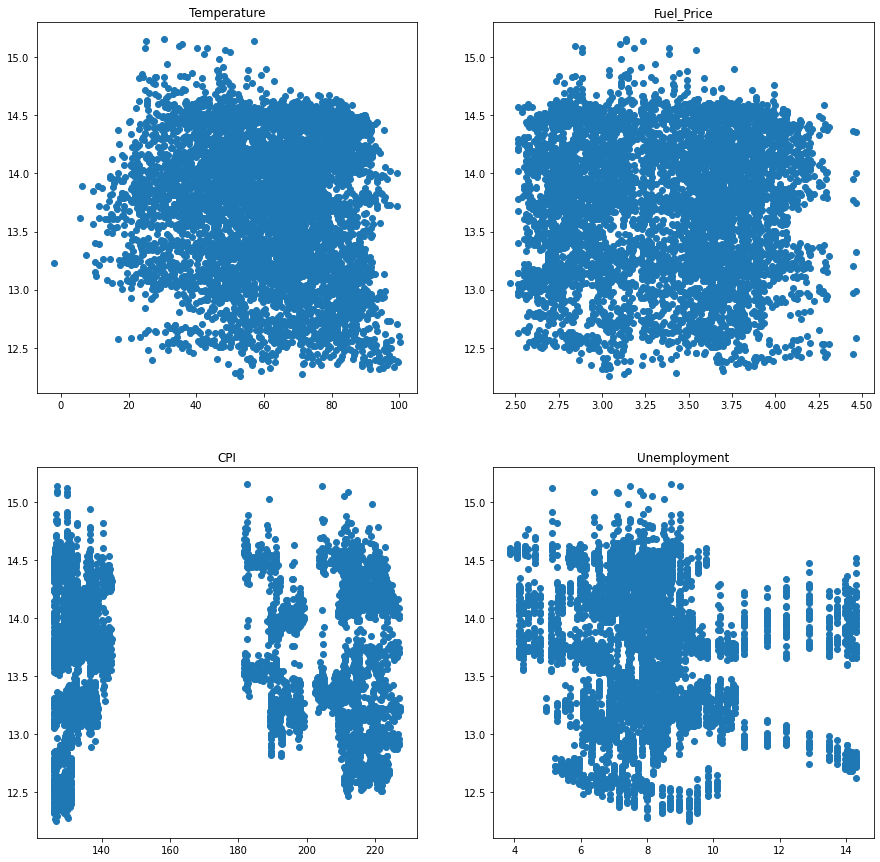

In [30]:
fig, ax=plt.subplots(2,2,figsize=(15,15))
i=0
for col in ('Temperature', 'Fuel_Price', 'CPI', 'Unemployment'):
    ax[i//2,i%2].scatter(X[col],y)
    ax[i//2,i%2].set_title(col)
    i=i+1
plt.show()

There is no apparenet deviation from linearity assumption. Also, as shown above, adding square and interaction terms didn't change model results significantly, which also supports hypothese that dependency is linear.

In case of dummy variables (Store, Week) there could be no non-linear dependency, since they take only value 0 and 1. However, there could be interaction between these variables and continuous regressors. If it is the case, regression coefficients for regressors will be different for different shops. 

We will estimate regression coefficients for each combination of (shop,regressor) using bootstraping. In case of interaction there will be difference between the shops.

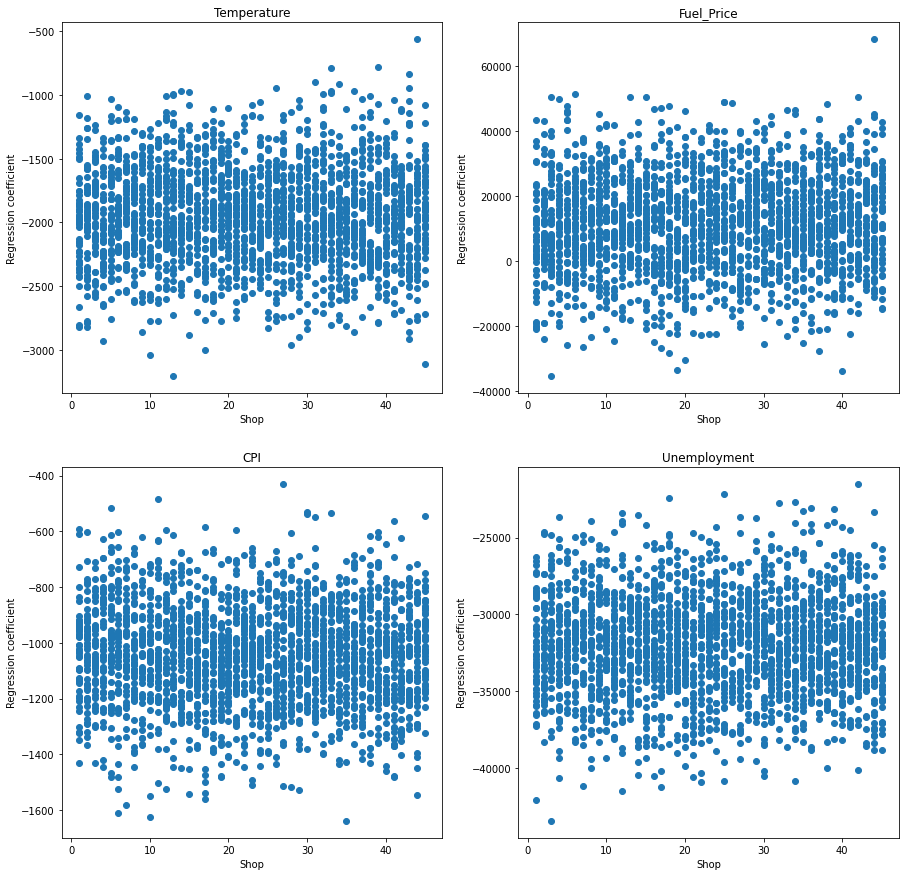

In [31]:
numboot=50
fig, ax=plt.subplots(2,2,figsize=(15,15))
k=0
for col in ('Temperature', 'Fuel_Price', 'CPI', 'Unemployment'):
    shops=[]
    coefs=[]
    for i in range(1,46):
        df1=df[df.Store==i][[col,'Weekly_Sales']]
        for j in range(numboot):
            df2=df.sample(frac=1, replace=True)
            x1=df2[[col]]
            y1=df2[['Weekly_Sales']]
            shops.append(i)
            coefs.append(lreg.fit(x1,y1).coef_[0][0])
#        print(lreg.fit(x1,y1).coef_)
    ax[k//2,k%2].scatter(shops,coefs)
    ax[k//2,k%2].set_xlabel("Shop")
    ax[k//2,k%2].set_ylabel("Regression coefficient")
    ax[k//2,k%2].set_title(col)
    k=k+1
    
plt.show()

There is no visible dependency in regression coefficients for different shops.

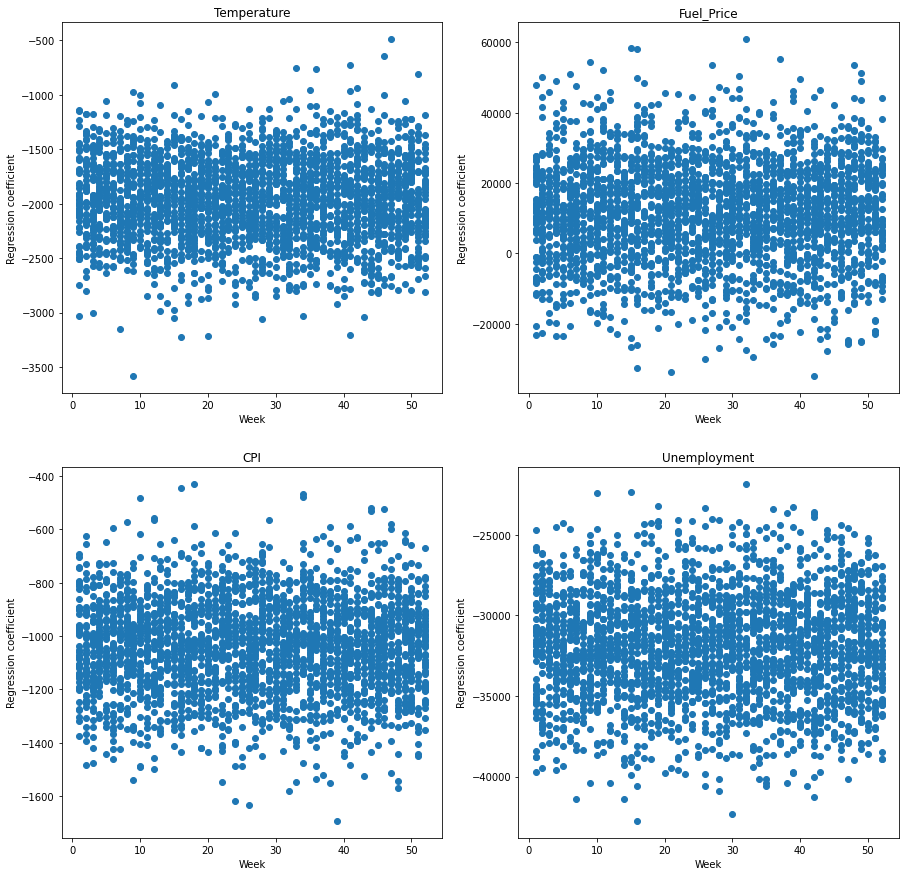

In [32]:
numboot=50
fig, ax=plt.subplots(2,2,figsize=(15,15))
k=0
for col in ('Temperature', 'Fuel_Price', 'CPI', 'Unemployment'):
    shops=[]
    coefs=[]
    for i in range(1,53):
        df1=df[df.Date.dt.isocalendar().week==i][[col,'Weekly_Sales']]
        for j in range(numboot):
            df2=df.sample(frac=1, replace=True)
            x1=df2[[col]]
            y1=df2[['Weekly_Sales']]
            shops.append(i)
            coefs.append(lreg.fit(x1,y1).coef_[0][0])
#        print(lreg.fit(x1,y1).coef_)
    ax[k//2,k%2].scatter(shops,coefs)
    ax[k//2,k%2].set_xlabel("Week")
    ax[k//2,k%2].set_ylabel("Regression coefficient")    
    ax[k//2,k%2].set_title(col)
    k=k+1
    
plt.show()

There is no visible dependency in regression coefficients for different shops.

We have not found deviations from linearity in our model.

2. Normality: Residuals are normally distributed about expected value

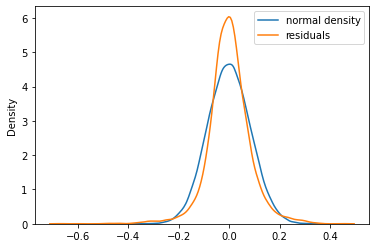

In [33]:
diff=np.array(y-y_pred)
norm = np.random.normal(loc=np.mean(diff),scale=np.std(diff),size=50000)
sns.kdeplot(norm,label='normal density')
sns.kdeplot(diff,label='residuals')
plt.legend()
plt.show()

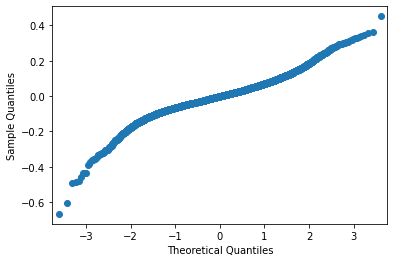

In [34]:
import statsmodels.api as sm
sm.qqplot(diff)
plt.show()

There is very clear deviation from normal distribution in residuals.

3. Constant variance (Homoscedasticity)

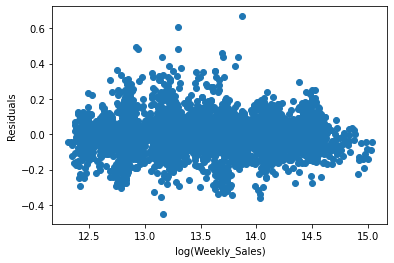

In [35]:
plt.scatter(y_pred,y_pred-y)
plt.xlabel('log(Weekly_Sales)')
plt.ylabel('Residuals')
plt.show()

The chart above suggest that homoscedasticity is fulfilled in our case.

4. Independence: Observations are independent of one another

4a. Independence of the error term and variables

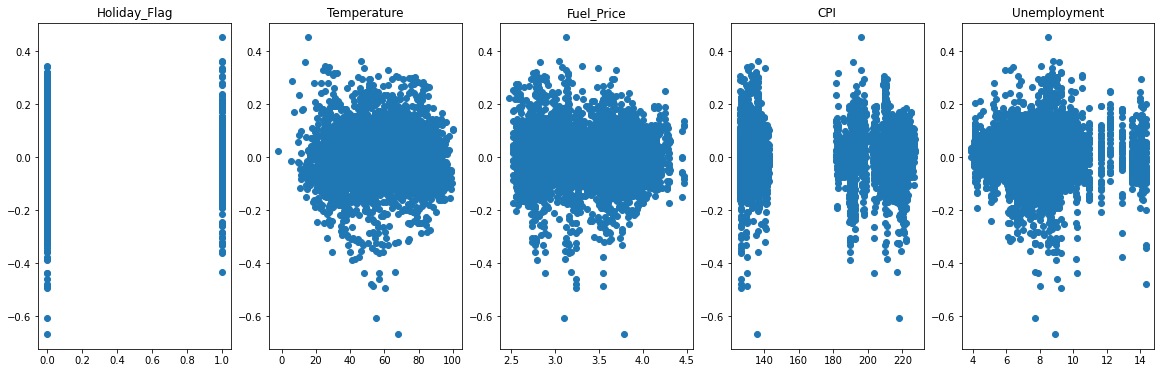

In [36]:
fig,ax=plt.subplots(1,5,figsize=(20,6))
i=0
for col in ('Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'):
    var = X[col]
    ax[i].scatter(var,diff)
    ax[i].set_title(col)
    i=i+1
plt.show()

Error terms and regressors seems to be independent

4b. Autocorrelation

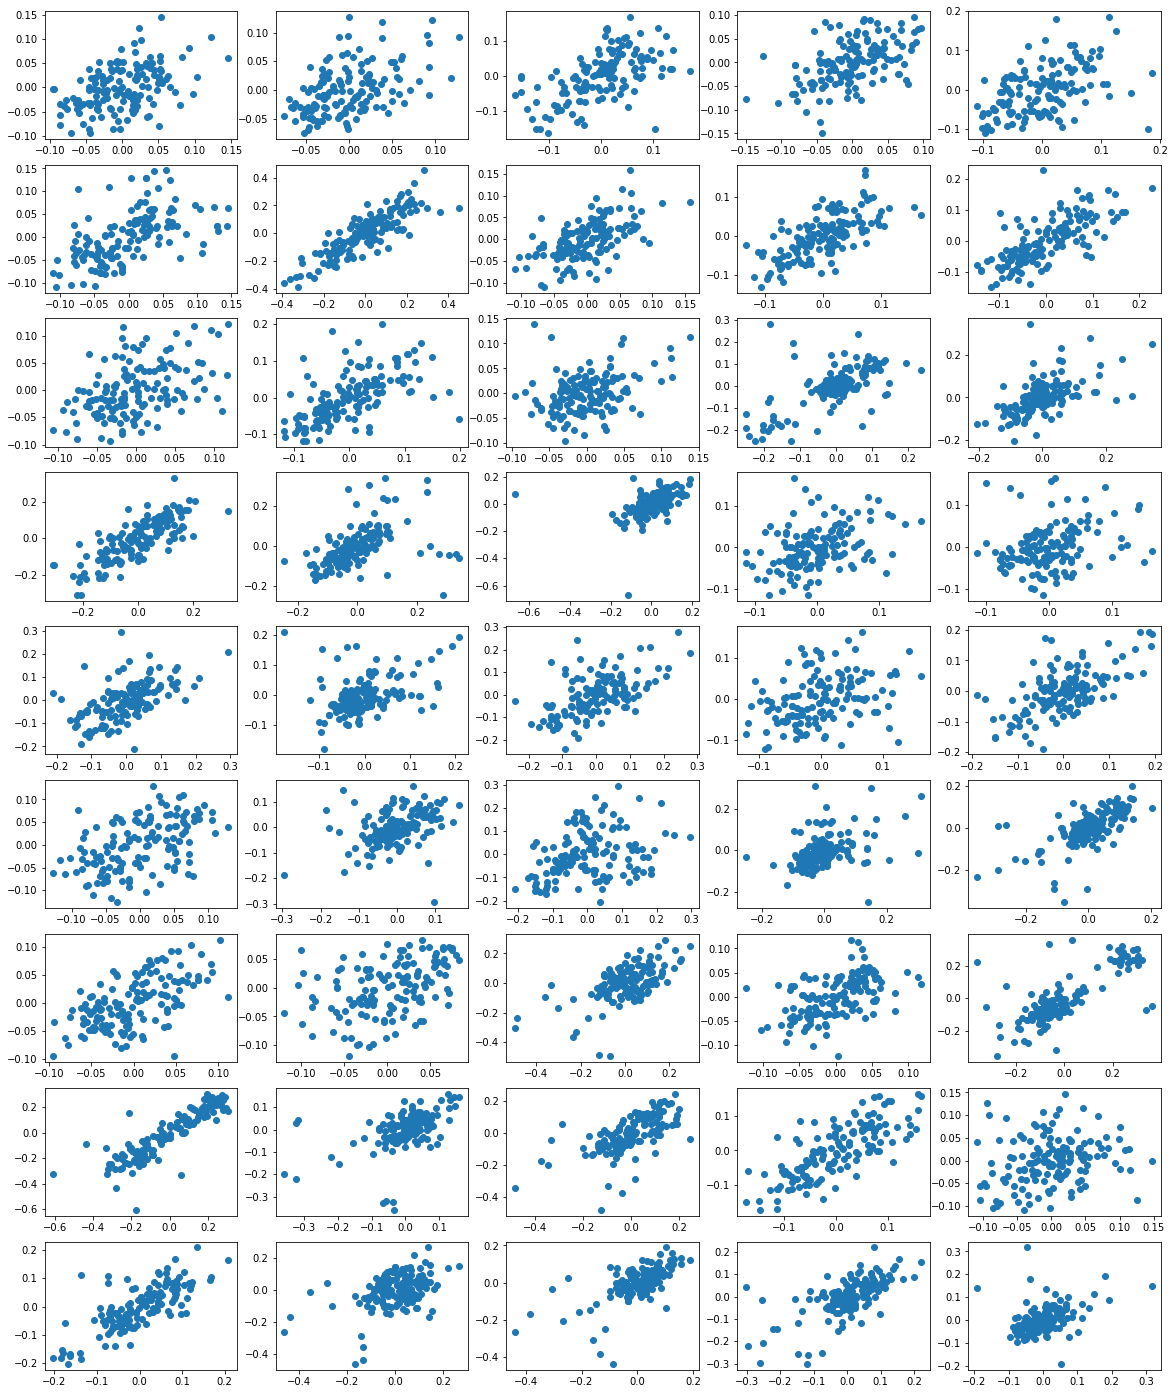

In [37]:
fig, ax=plt.subplots(9,5,figsize=(20,25))
j=0
# Observations of the error term are uncorrelated with each other
df1=pd.concat([df[['Store']],pd.DataFrame({'Error_Term':diff})],axis=1)
for i in range(1,46):
    s = df1[df1.Store==i]['Error_Term']
    x=s[1:]
    y=s[:-1]
    ax[j//5,j%5].scatter(x,y)
    j=j+1
plt.show()

There is very clear autocorrelation between regressors.

5. Multicollinearity 

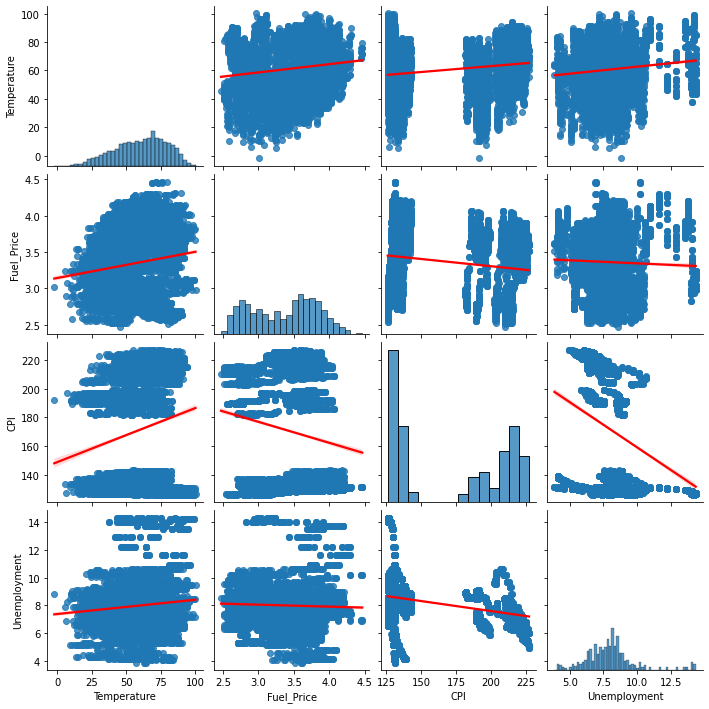

In [38]:
sns.pairplot(df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']], 
             kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

There is clear correlation between regressors but there is no perfect multicollinearity.

As shown above not all linear regression assumptions are fulfilled in our model. It means that some other model can show superior results. We will use different tree-based approaches to understand if we can create a model with better precession.

# Time Series Analysis

As presented before, we found that the majority of stores have similar trends. The dataset has an obvious seasonal component and no obvious trend. Weekly sales tend to peak for the Thanksgiving and Christmas season and then decline after the holidays.

In [39]:
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.api import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from scipy.stats import normaltest
import warnings
warnings.filterwarnings("ignore")

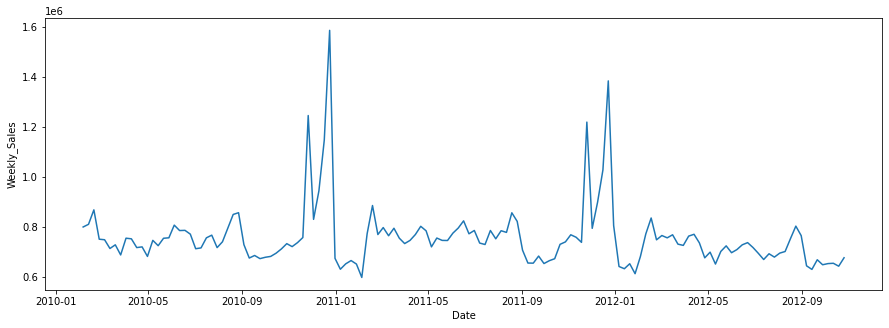

In [40]:
store =df[df['Store']==21]
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=store, x='Date',y='Weekly_Sales')
plt.show()

However, five stores [36, 38, 42, 43, 44] have different trend. The dataset contains an obvious trend but no obvious seasonal component. To make it stationary, we will calculate the difference between sales in each week and create a new dataframe to store the difference. Below shows how our data looked before and after the differencing transformation.

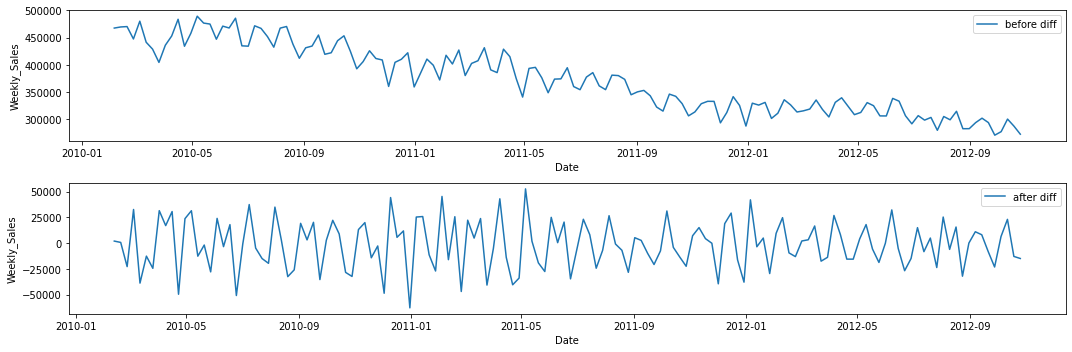

In [41]:
store =df[df['Store']==36]
store_dif = store.copy()
store_dif['Weekly_Sales'] = store['Weekly_Sales'].diff().dropna()
fig, ax = plt.subplots(2, figsize=(15, 5))
sns.lineplot(data=store, x='Date',y='Weekly_Sales',label='before diff',ax=ax[0])
sns.lineplot(data=store_dif, x='Date',y='Weekly_Sales',label='after diff',ax=ax[1])
plt.tight_layout()

Conduct ADF test on the new data to check the stationary.

In [42]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [43]:
check_stationarity(store_dif['Weekly_Sales'].dropna())

The series is stationary


We take store 21 to represent the no trend group and store 36 to represent the trend group.

In [44]:
df_index = df.set_index('Date')
store_a = df_index[df_index.Store == 21]['Weekly_Sales'].to_frame()
store_b = df_index[df_index.Store == 36]['Weekly_Sales'].to_frame()

Using ACF and PACF charts to find the optimal parameters.


The next step is to review Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots. ACF can be used to help determine the optimal number of terms (q) to use in an Moving Average (MA). PACF can be used to help determine the optimal number of terms (p) to use in an AutoRegressive (AR) model.

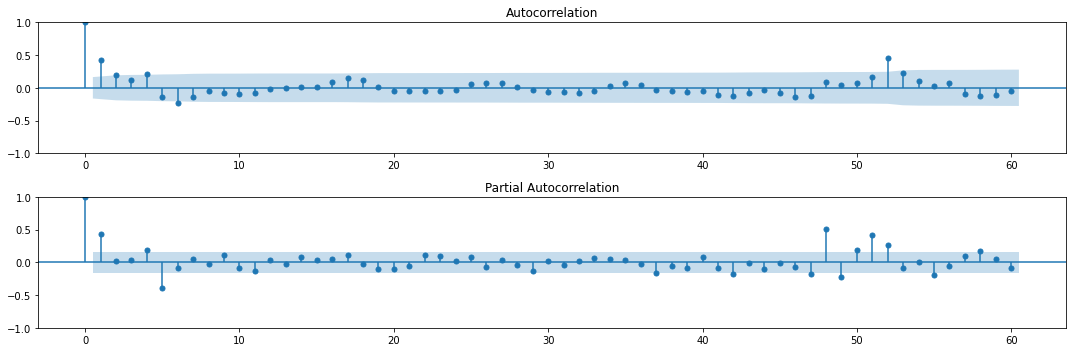

In [45]:
fig, ax = plt.subplots(2, figsize=(15, 5))
plot_acf(store_a, lags = 60, ax = ax[0]);
plot_pacf(store_a, lags = 60, ax = ax[1]);
plt.tight_layout()

Judging from the plot above, there is a strong positive autocorrelation in lag-52 as well as lag-1 as we expected when observing the time series plot. The significant spike at lag-1 in the ACF suggests a non-seasonal MA(1) component, and the significant spike at lag-52 in the ACF suggests a seasonal MA(1) component. This implies a cyclical annual pattern at the end of the year.

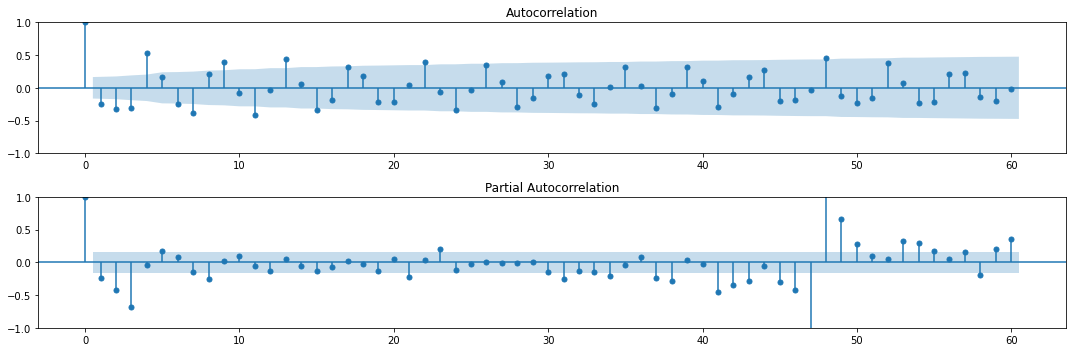

In [46]:
store_b_dif = store_b.diff().dropna()
fig, ax = plt.subplots(2, figsize=(15, 5))
plot_acf(store_b_dif, lags = 60, ax = ax[0]);
plot_pacf(store_b_dif, lags = 60, ax = ax[1]);
plt.tight_layout()

Both the ACF and PACF show significant spikes at lag-4. Consequently, we begin with an ARIMA(4,1,4) model for the non trend group.

Next we will fit the model.

First we split the dataset into train and test sets.

In [47]:
test_size = 0.25
def ts_train_test_split(data, n):
    return data[:-n], data[-n:]
train_a, test_a = ts_train_test_split(store_a,int(test_size*len(store_a)))
train_b, test_b = ts_train_test_split(store_b,int(test_size*len(store_b)))

For the dataset has an obvious seasonal component, we use SARIMA to fit the model. SARIMA stands for Seasonal-ARIMA and it includes seasonality contribution to the forecast. AIC (Akaike information criterion) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. The low AIC value the better. Our output suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 52) is the best combination, so we consider this to be optimal option.

In [48]:
model_a = SARIMAX(train_a, trend='n', order=(1,1,1), seasonal_order=(1,1,1,52)).fit(disp=0)
print(model_a.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -668.500
Date:                            Sat, 10 Dec 2022   AIC                           1347.001
Time:                                    09:17:29   BIC                           1357.037
Sample:                                02-05-2010   HQIC                          1350.882
                                     - 02-24-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1963      0.505      0.389      0.698      -0.794       1.186
ma.L1         -0.4722      0.448   

The residuals from this model can be used to observe the uncorrelated error.

In [49]:
def residual_plot(model):

    resid = model.resid
    print(normaltest(resid))
    # returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
    # the residual is not a normal distribution

    fig = plt.figure(figsize=(15,5))
    ax0 = fig.add_subplot(111)

    sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

    # Get the fitted parameters used by the function
    (mu, sigma) = stats.norm.fit(resid)

    #Now plot the distribution using 
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('Residual distribution')


    # ACF and PACF
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(model.resid, lags=30, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(model.resid, lags=30, ax=ax2)
    plt.tight_layout()

NormaltestResult(statistic=38.61852025118878, pvalue=4.1123955243360285e-09)


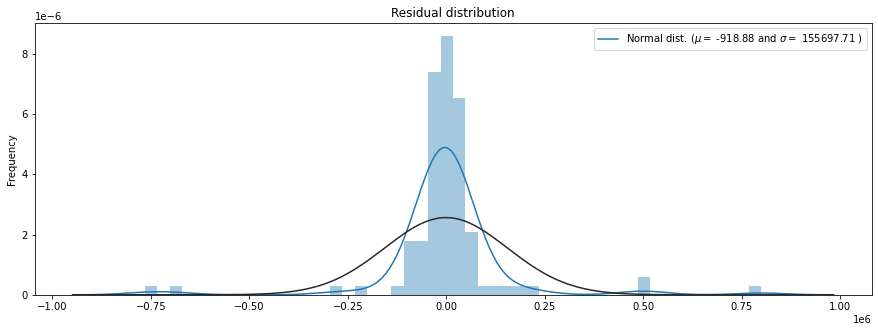

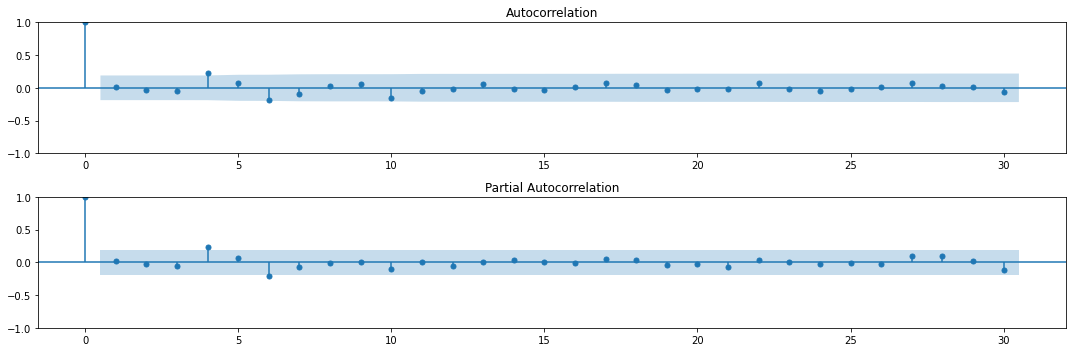

In [50]:
residual_plot(model_a)

All the spikes are now within the significance limits, so the residuals appear to be white noise.

In [51]:
model_b = SARIMAX(train_b, trend='c', order=(4,1,4)).fit(disp=0)
print(model_b.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  108
Model:               SARIMAX(4, 1, 4)   Log Likelihood               -1209.662
Date:                Sat, 10 Dec 2022   AIC                           2439.325
Time:                        09:17:32   BIC                           2466.053
Sample:                    02-05-2010   HQIC                          2450.160
                         - 02-24-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3867.2201   9198.512     -0.420      0.674   -2.19e+04    1.42e+04
ar.L1         -0.7775      2.693     -0.289      0.773      -6.055       4.500
ar.L2         -0.8930      1.560     -0.572      0.5

NormaltestResult(statistic=204.7574539485925, pvalue=3.447337556766969e-45)


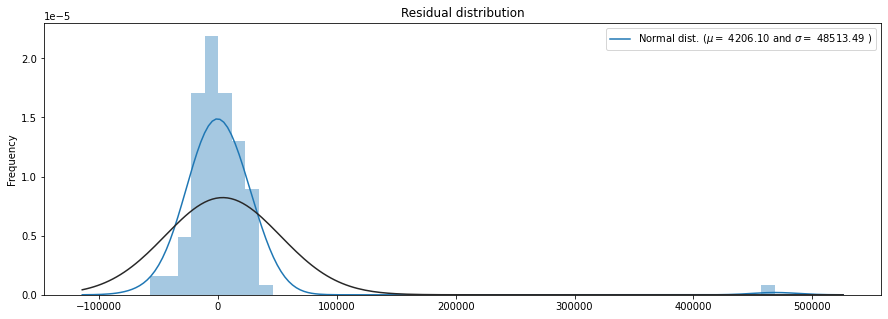

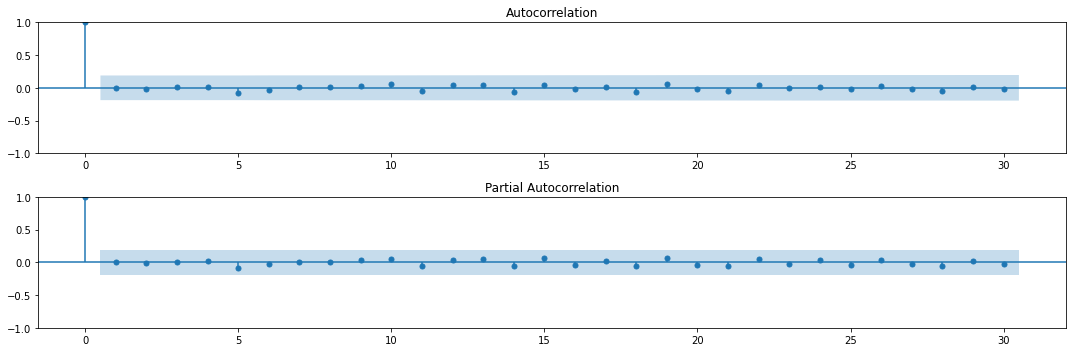

In [52]:
residual_plot(model_b)

We now have the model that is ready for forecasting. Forecasts from the model for the test data are shown below. 

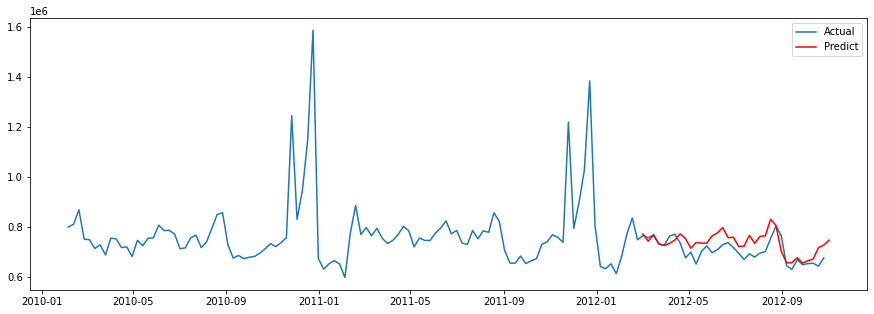

In [53]:
plt.figure(figsize=(15,5))
forecast_a = model_a.predict(start = len(store_a)-int(test_size*len(store_a)), end = len(store_a), dynamic= False)  
plt.plot(store_a, label='Actual')
plt.plot(forecast_a, label = 'Predict', c = "red")
plt.legend()
plt.show()

In [54]:
start = len(store_a)-int(test_size*len(store_a))-1
rmse = np.sqrt(mean_squared_error(store_a.iloc[start:], forecast_a))
print('The Root Mean Squared Error is {}'.format(round(rmse)))
scores = scores.append(pd.DataFrame({'Train Score':np.nan,
                                     'Test Score':np.sqrt(mean_squared_error(store_a.iloc[start:], forecast_a))},
                                    index=['Time Series(RMSE, Store 21)']))

The Root Mean Squared Error is 56730


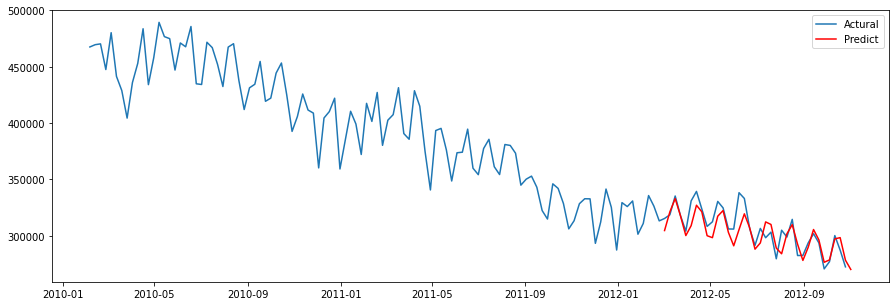

In [55]:
plt.figure(figsize=(15,5))
forecast_b = model_b.predict(start = len(store_b)-int(test_size*len(store_b)), end = len(store_b), dynamic= False)  
plt.plot(store_b, label='Actural')
plt.plot(forecast_b, label = 'Predict', c = "red")
plt.legend()
plt.show()

In [56]:
start = len(store_b)-int(test_size*len(store_b))-1
rmse = np.sqrt(mean_squared_error(store_b.iloc[start:], forecast_b))
print('The Root Mean Squared Error is {}'.format(round(rmse)))
scores = scores.append(pd.DataFrame({'Train Score':np.nan,
                                     'Test Score':np.sqrt(mean_squared_error(store_b.iloc[start:], forecast_b))},
                                    index=['Time Series(RMSE, Store 36)']))

The Root Mean Squared Error is 13146


Our forecasts fit with the true values moderately well. The forecasting model has a lot of rooms to improve further by tuning the hyperparameters. Cons: SARIMA has 7 hyperparameters which can be tuned affecting significantly the speed of the forecasting process.

# Boosting

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from tqdm import tqdm, trange

Dataset without one-hot-encoding

In [58]:
df=pd.read_csv("../input/retail-analysis-with-walmart-data/Walmart_Store_sales.csv")

df['Date'] =  pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Week'] = df['Date'].dt.isocalendar().week.astype("int64")


X = df.drop(columns=['Weekly_Sales', 'Date'])
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=109)
print("X Training dataset shape:", X_train.shape)
print("X Test dataset shape:", X_test.shape)
print("Y Training dataset shape:", y_train.shape)
print("Y Test dataset shape:", y_test.shape)

X Training dataset shape: (4826, 7)
X Test dataset shape: (1609, 7)
Y Training dataset shape: (4826,)
Y Test dataset shape: (1609,)


Dataset with one-hot-encoding

In [59]:
X_encode = pd.concat([pd.get_dummies(df.Store, prefix='Store'),
                      pd.get_dummies(df.Date.dt.isocalendar().week, prefix='Week'),
                      df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]],
                      axis=1)

X_train_encode, X_test_encode, y_train, y_test = train_test_split(X_encode, y, test_size=0.25, random_state=109)

## Gradient Boosting (XGBoost)

Here, I chose the XGBoost (Extreme Gradient Boosting) because compared to Gradient Boosting, XGBoost uses a more regularized model formalization to control overfitting, which gives it better performance in general.

Let's try fitting XGBoost model using the default parameters and see how it performs.

XGBoost without OHE

In [60]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, 
              y_train);

Default values of hyperparameters

In [61]:
pd.DataFrame(xgb_model.get_xgb_params(),index=[0]).melt()

,variable,value
0,objective,reg:squarederror
1,base_score,0.5
2,booster,gbtree
3,colsample_bylevel,1
4,colsample_bynode,1
5,colsample_bytree,1
6,eval_metric,None
7,gamma,0
8,gpu_id,-1
9,grow_policy,depthwise


In [62]:
print("Training score for XGBoost (without OHE):", xgb_model.score(X_train, y_train))
print("Test score for XGBoost (without OHE):", xgb_model.score(X_test, y_test))

Training score for XGBoost (without OHE): 0.9967416940184818
Test score for XGBoost (without OHE): 0.9762840015386958


XGBoost with OHE

In [63]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_encode, 
              y_train);

In [64]:
print("Training score for XGBoost (with OHE):", xgb_model.score(X_train_encode, y_train))
print("Test score for XGBoost (with OHE):", xgb_model.score(X_test_encode, y_test))

Training score for XGBoost (with OHE): 0.9938574614448825
Test score for XGBoost (with OHE): 0.9683196171938906


Based on what we saw above, XGBoost works quite well without One-Hot-Encoding of categorical variables. It actually performed slightly better although the difference is not significantly large. Below, we will only consider the dataset without OHE since we observed that XGBoost can work with the label encoding and performed even better.

XGBoost seems to perform great already with the default parameters, but let's see if we can make any improvements by tuning hyperparameters. To make it more efficient, I made three rounds of 'param_grid'. It takes too long if we put too many values to check at once, so I updated values for each round based on the results from the previous round. 

In [65]:
# # Round 1
# param_grid = {
#     'max_depth': [3, 5, 7, 9],
#     'learning_rate': [0.1, 0.5, 1],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0]
# }
# # Round 2
# param_grid = {
#     'max_depth': [6, 7, 8],
#     'learning_rate': [0.1, 0.2, 0.3],
#     'gamma': [0],
#     'reg_lambda': [0.5, 1, 3]
# }
# # Round 3
# param_grid = {
#     'max_depth': [6],
#     'learning_rate': [0.2, 0.3],
#     'gamma': [0],
#     'reg_lambda': [1]
# }

# optimal_params = GridSearchCV(
#     estimator=xgb.XGBRegressor(objective='reg:squarederror',
#                                subsample=0.9,
#                                colsample_bytree=1,
#                                seed=109),
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',
#     cv=5)
# optimal_params.fit(X_train, y_train)

# optimal_params.best_params_
# output: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'reg_lambda': 10}

Now that we know the best parameters, let's fit XGBoost regression model using those.

* Note: Below hyperparameters are set in order to reduce overfitting and improve speed.  
`subsample`: subsample ratio of the training data for every iteration (90% in our case)  
`early_stopping_rounds`: number of rounds that the model keeps iterating after reaching the lowest RMSE.  
`verbose`: 'True' shows the details of each iteration.

In [66]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             gamma=0,
                             reg_lambda=1,
                             learning_rate=0.2,
                             max_depth=6,
                             subsample=0.9,
                             colsample_bytree=1,
                             early_stopping_rounds=10,
                             eval_metric='rmse',
                             n_estimators=500,
                             seed=109)
xgb_model.fit(X_train, 
              y_train,
              verbose=False,
              eval_set=[(X_test, y_test)]);

In [67]:
print("Training score for XGBoost (after tuning):", xgb_model.score(X_train, y_train))
print("Test score for XGBoost (after tuning):", xgb_model.score(X_test, y_test))

Training score for XGBoost (after tuning): 0.9970006402842951
Test score for XGBoost (after tuning): 0.9786349311319634


In [68]:
scores=scores.append(pd.DataFrame({'Train Score':xgb_model.score(X_train, y_train),
                                   'Test Score':xgb_model.score(X_test, y_test)}, index=['XGBoost']))

The test score very slightly improved from the first XGBoost model we created because it turns out that the default parameters were very close to what we found after tuning. Also, it is not surprising because we already had a very high score previously.    

Below, I want to check how many iterations were actually needed. The RMSE table shows that the lowest RMSE is reached with 153 iterations. It then becomes larger with more iterations, so it finally stops iterating at 163th iteration. 

In [69]:
rmse = pd.DataFrame(xgb_model.evals_result_.values())['rmse'].to_list()[0]

rmse_data = pd.DataFrame({'Iterations': range(152,164), 'RMSE': rmse[152:164]})
rmse_data

,Iterations,RMSE
0,152,83511.289817
1,153,83506.359029
2,154,83536.974902
3,155,83522.111858
4,156,83602.593674
5,157,83586.701249
6,158,83558.214379
7,159,83596.410252
8,160,83629.091031
9,161,83574.846142


When RMSE reaches the minimum:

In [70]:
rmse_data.iloc[rmse_data['RMSE'].argmin()]

Iterations      153.000000
RMSE          83506.359029
Name: 1, dtype: float64

Below, we can see which features are considered more important in our XGBoost model.

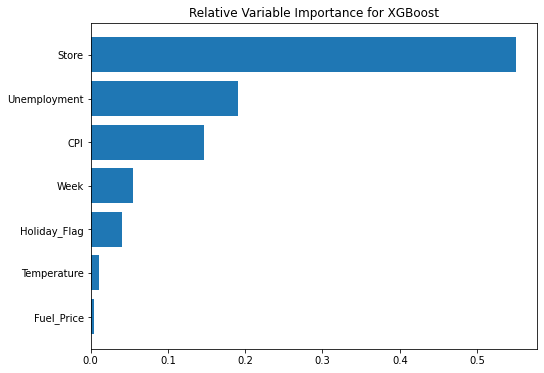

In [71]:
plt.figure(figsize=(8,6))
num_features = 7 
importances = xgb_model.feature_importances_
order = np.argsort(importances)[-num_features:]
plt.barh(range(num_features), importances[order], tick_label=X.columns[order]);
plt.title("Relative Variable Importance for XGBoost");

# Random Forest

In [72]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm, trange

**One-hot-encode for feature Date and Store**

In [73]:
df=pd.read_csv("../input/retail-analysis-with-walmart-data/Walmart_Store_sales.csv")
df['Date'] =  pd.to_datetime(df['Date'], format="%d-%m-%Y")
X_encode = pd.concat([pd.get_dummies(df.Store, prefix='Store'),
                      pd.get_dummies(df.Date.dt.isocalendar().week, prefix='Week'),
                      df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]],
                      axis=1)
y = df.Weekly_Sales

random_state=109

X_train_encode, X_test_encode, y_train, y_test = train_test_split(X_encode, y, test_size=0.25, random_state=random_state)

In [74]:
print(f'Train X dataset shape: {X_train_encode.shape}')
print(f'Test X dataset shape: {X_test_encode.shape}')
print(f'Train y shape: {y_train.shape}')
print(f'Test y shape: {y_test.shape}')

Train X dataset shape: (4826, 102)
Test X dataset shape: (1609, 102)
Train y shape: (4826,)
Test y shape: (1609,)


In [75]:
n_trees = 100
tree_depth = range (1, 31)
dic = {'depth':[], 'oob_list':[], 'train_score':[]}

# find the best tree depth
for i in tree_depth:
    rf = RandomForestRegressor(max_depth=i, n_estimators=n_trees, max_features= 0.5, oob_score=True, 
                               random_state=random_state).fit(X_train_encode, y_train)
    dic['depth'].append(i)
    dic['oob_list'].append(rf.oob_score_)
    dic['train_score'].append(rf.score(X_train_encode, y_train))

In [76]:
best_ind = np.argmax(dic['oob_list'])
best_depth = dic['depth'][best_ind]

In [77]:
# fit random forest on full X_train by using the best tree depth
rf_encode = RandomForestRegressor(max_depth=best_depth, n_estimators=n_trees, max_features= 0.5, 
                                  random_state=random_state).fit(X_train_encode, y_train)

In [78]:
random_forest_train_score_encode = rf_encode.score(X_train_encode, y_train)
random_forest_test_score_encode = rf_encode.score(X_test_encode, y_test)

print(
    "Random Forest with {} number of trees and max-depth {} trained on the "
    "full training set achieves the following accuracy scores:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}".format(
        n_trees,
        best_depth,
        random_forest_train_score_encode,
        random_forest_test_score_encode,
    )
)

Random Forest with 100 number of trees and max-depth 30 trained on the full training set achieves the following accuracy scores:

	Train	0.9883
	TEST	0.9588


In [79]:
scores=scores.append(pd.DataFrame({'Train Score':random_forest_train_score_encode,
                                   'Test Score':random_forest_test_score_encode}, index=['Random Forest (with OHE)']))

**NONE one-hot-ecoding for feature Date, and Store**

In [80]:
# Convert colume 'Date' to 'Week'
df=pd.read_csv("../input/retail-analysis-with-walmart-data/Walmart_Store_sales.csv")
df['Date'] =  pd.to_datetime(df['Date'], format="%d-%m-%Y")
df_2 = df.drop(['Date'], axis=1)
df_2['Week'] = df.Date.dt.isocalendar().week

In [81]:
random_state = 109

train_df_2, test_df_2 = train_test_split(df_2, test_size=0.25, random_state=random_state)
X_train, y_train = train_df_2.drop(['Weekly_Sales'], axis=1), train_df_2['Weekly_Sales']
X_test, y_test = test_df_2.drop(['Weekly_Sales'], axis=1), test_df_2['Weekly_Sales']

In [82]:
print(f'Train X dataset shape: {X_train.shape}')
print(f'Test X dataset shape: {X_test.shape}')
print(f'Train y shape: {y_train.shape}')
print(f'Test y shape: {y_test.shape}')

Train X dataset shape: (4826, 7)
Test X dataset shape: (1609, 7)
Train y shape: (4826,)
Test y shape: (1609,)


As we only have 7 features, using 7/3 as subset number of predicors would be too small. Set up max_feature as 0.5 to sample half number of features for each split.

In [83]:
n_trees = 100
tree_depth = range (1, 31)
dic = {'depth':[], 'oob_list':[], 'train_score':[]}

# find the best tree depth
for i in tree_depth:
    rf = RandomForestRegressor(max_depth=i, n_estimators=n_trees, max_features= 0.5, oob_score=True, 
                               random_state=random_state).fit(X_train, y_train)
    dic['depth'].append(i)
    dic['oob_list'].append(rf.oob_score_)
    dic['train_score'].append(rf.score(X_train, y_train))

In [84]:
best_ind = np.argmax(dic['oob_list'])
best_depth = dic['depth'][best_ind]

In [85]:
# fit random forest on full X_train by using the best tree depth
rf = RandomForestRegressor(max_depth=best_depth, n_estimators=n_trees, max_features= 0.5,
                           random_state=random_state).fit(X_train, y_train)

In [86]:
random_forest_train_score = rf.score(X_train, y_train)
random_forest_test_score = rf.score(X_test, y_test)

print(
    "Random Forest with {} number of trees and max-depth {} trained on the "
    "full training set achieves the following accuracy scores:"
    "\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}".format(
        n_trees,
        best_depth,
        random_forest_train_score,
        random_forest_test_score,
    )
)

Random Forest with 100 number of trees and max-depth 19 trained on the full training set achieves the following accuracy scores:

	train	0.9930
	TEST	0.9560


In [87]:
scores=scores.append(pd.DataFrame({'Train Score':random_forest_train_score,
                                   'Test Score':random_forest_test_score}, index=['Random Forest (without OHE)']))

In [88]:
pd.DataFrame({'Train Score':random_forest_train_score,
                            'Test Score':random_forest_test_score}, index=['Random Forest (without OHE)'])

,Train Score,Test Score
Random Forest (without OHE),0.993029,0.956001


Comparing one-hot-encoding and NONE one-hot-encoding, The models performance are pretty close. So based on similar performance, we would prefer treating features 'Date/Week' and 'Store' as ordinal variables as there are less predictor variables and has smaller tree depth comapring to one-hot-encoding.  

Below Feataure Importance are based on the none one-hot-encoding. 

# Feature Importance (Random Forest)

In [89]:
# set up empty datafram to report feature importance 
columns = X_train.columns
top_predictors_rf = pd.DataFrame(columns=X_train.columns)
top_predictors_rf.loc['top node counts', :] = 0
top_predictors_rf.loc['second node counts', :] = 0

In [90]:
# record top node and seconde node for each tree
top_node_rf, second_node_rf = [], []

for i in range(len(rf.estimators_)):
    ind = rf.estimators_[i].tree_.feature[0]
    top_node_rf.append(ind)
    
    ind_sec = rf.estimators_[i].tree_.feature[1]
    second_node_rf.append(ind_sec)

In [91]:
top_feature, second_feature=[], []
for i in top_node_rf:
    n = columns[i]
    top_feature.append(n)
feature_rf = pd.DataFrame(top_feature).value_counts()

for i in second_node_rf:
    n = columns[i]
    second_feature.append(n)
second_feature_rf = pd.DataFrame(second_feature).value_counts()

In [92]:
# counts of each feature as the first node and second node 
for i in range(len(feature_rf)):
    top_predictors_rf.loc['top node counts', feature_rf.index[i]] = feature_rf[i]

for i in range(len(second_feature_rf)):
    top_predictors_rf.loc['second node counts', second_feature_rf.index[i]] = second_feature_rf[i]
    
display(top_predictors_rf)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week
top node counts,38,0,5,0,5,36,16
second node counts,38,0,4,2,28,16,12


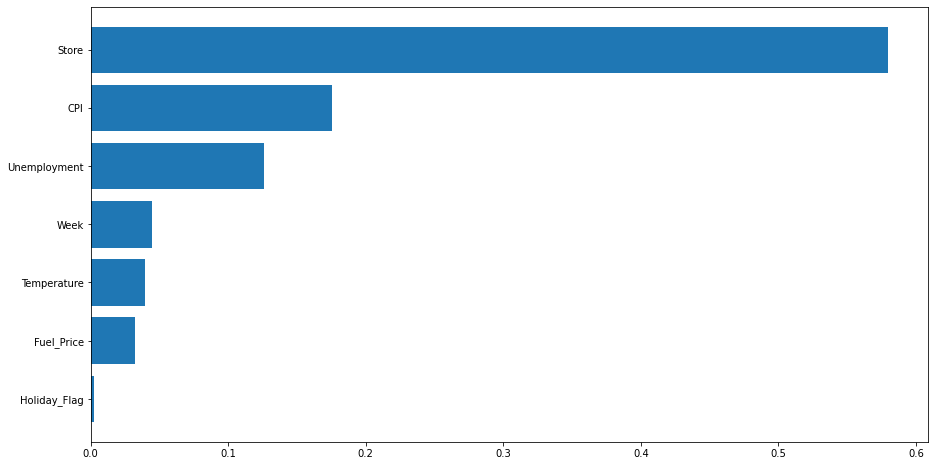

In [93]:
num_features = X_train.shape[1]
importances = rf.feature_importances_
order = np.argsort(importances)[-num_features:]

plt.figure(figsize=(15,8))
plt.barh(range(num_features), importances[order], tick_label=X_train.columns[order]);

The Store is the most imprtant feature.
The Holiday_Flag is binary variable, and the model may underestimate its importance. 

Overall, the Random Forest performs pretty well. However, considering there are only 7 features in the dataset, random forest subset may not have enough relevant predictors.

## Model comparison

Models performance summarized in the dataframe below

In [94]:
scores.sort_values('Test Score').head(10)

,Train Score,Test Score
Random Forest (without OHE),0.993029,0.956001
Random Forest (with OHE),0.988340,0.958831
Linear regression,0.975517,0.975733
XGBoost,0.997001,0.978635
"Time Series(RMSE, Store 36)",NaN,13146.186780
"Time Series(RMSE, Store 21)",NaN,56730.316235
Linear regression (RMSE),86048.049244,86641.836049
Baseline Model (RMSE),157660.393005,163569.593955
